In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer

In [4]:
numx = 30
numy = 60
x0 = numx // 2
y0 = numy // 2
t0 = 0

In [5]:
T = 2
dt = 0.0001
save_interval=10
smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.01)

strength_list = np.arange(.004, .044, .004)
calcium_data_list = []
for strength in strength_list:
    layer = Layer(smc, 
                  numx=numx, 
                  numy=numy, 
                  gip3x=0.1, 
                  gip3y=2.0, 
                  gcx=1000, 
                  gcy=1000,
                  save_interval=save_interval, 
                  stim_strength_fast=strength)

    layer.set_stim_pattern(pathway='fast',
                           xmin=14, xmax=16, ymin=29, ymax=31,
                           stim_times=[0])

    sol = layer.run(save_all=True)
    
    # Extract calcium data
    calcium = sol[:, :numx * numy].reshape(-1, numx, numy)
    calcium_data_list.append(calcium)

100%|██████████| 20000/20000 [00:27<00:00, 731.81it/s] 


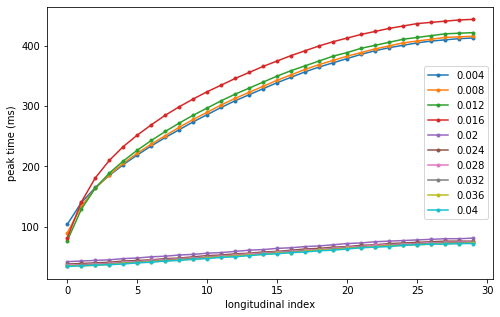

In [6]:
# Plot the peak arrival time

plt.figure(figsize=(8,5))
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    pk_times = []
    for i in range(numy // 2):
        pk_times.append(np.argmax(ca_lon_half[:, i]) * dt * save_interval * 1000)
    plt.plot(pk_times, '.-', label=str(round(strength_list[index],4)))

plt.xlabel('longitudinal index')
plt.ylabel('peak time (ms)')
plt.legend()
plt.savefig('../../results/figures/sweep_stim_strength_fast/peak_times.png', bbox_inches='tight')
plt.show()

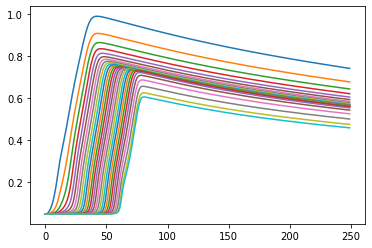

In [7]:
calcium = calcium_data_list[4]
ca_lon_half = calcium[:250, numx // 2, numy // 2:]
plt.plot(ca_lon_half)
plt.show()

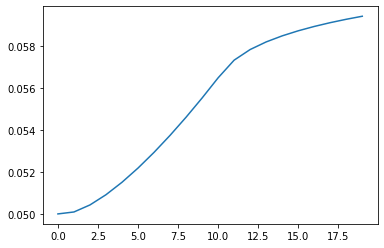

In [8]:
calcium = calcium_data_list[0]
ca_lon_half = calcium[:, numx // 2, numy // 2:]
plt.plot(ca_lon_half[:20, 0])
plt.show()

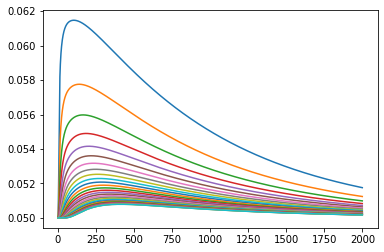

In [9]:
plt.plot(ca_lon_half)
plt.show()

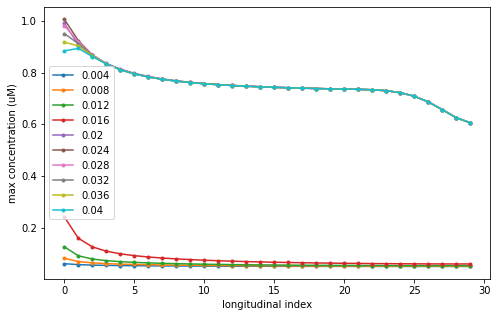

In [10]:
# Plot the amplitude

plt.figure(figsize=(8,5))
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    amps = []
    for i in range(numy // 2):
        amps.append(np.max(ca_lon_half[:, i]))
    plt.plot(amps, '.-', label=str(round(strength_list[index],4)))

plt.xlabel('longitudinal index')
plt.ylabel('max concentration (uM)')
plt.legend()
plt.savefig('../../results/figures/sweep_stim_strength_fast/amp.pdf', bbox_inches='tight')
plt.show()

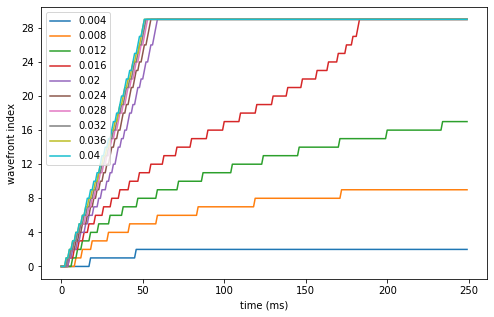

In [11]:
# Plot the wavefront index evolution

threshold = 0.055

plt.figure(figsize=(8,5))
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    wavefronts = []
    for t in np.arange(0, .25, 0.001):
        concentrs = ca_lon_half[int(t / 0.001)]
        for i in range(numy // 2 - 1, -1, -1):
            if concentrs[i] > threshold:
                break
        wavefronts.append(i) 
    plt.plot(np.arange(0, .25, 0.001) * 1000, wavefronts, label=str(round(strength_list[index],4)))

plt.yticks(range(0, 30, 4))
plt.xlabel('time (ms)')
plt.ylabel('wavefront index')
plt.legend()
plt.savefig('../../results/figures/sweep_stim_strength_fast/wavefront.png', bbox_inches='tight')
plt.show()

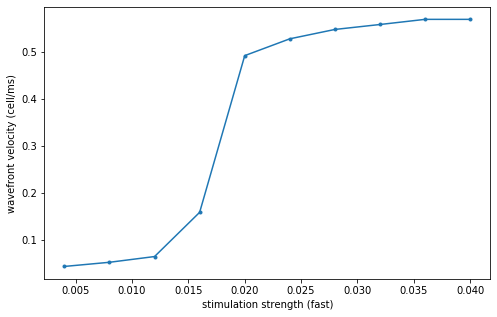

In [12]:
# Plot speed

threshold = 0.055

plt.figure(figsize=(8,5))

speeds = []

for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    wavefronts = []
    for t in np.arange(0, 2, 0.001):
        concentrs = ca_lon_half[int(t / 0.001)]
        for i in range(numy // 2 - 1, -1, -1):
            if concentrs[i] > threshold:
                break
        wavefronts.append(i) 
    speed = max(wavefronts) / ( np.argmax(wavefronts) * dt * save_interval * 1000 )
    speeds.append(speed)

plt.plot(strength_list, speeds, '.-')
plt.xlabel('stimulation strength (fast)')
plt.ylabel('wavefront velocity (cell/ms)')
plt.savefig('../../results/figures/sweep_stim_strength_fast/wavefront_velocity.png', bbox_inches='tight')
plt.show()

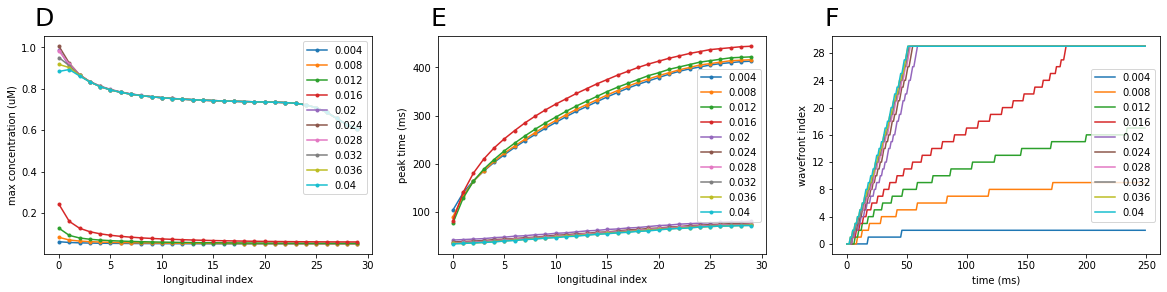

In [25]:
# Put together

fig, axs = plt.subplots(1,3,figsize=(20,4))

# Amplitude
ax = axs[0]
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    amps = []
    for i in range(numy // 2):
        amps.append(np.max(ca_lon_half[:, i]))
    ax.plot(amps, '.-', label=str(round(strength_list[index],4)))

ax.set_xlabel('longitudinal index')
ax.set_ylabel('max concentration (uM)')
ax.legend(loc='upper right')
ax.text(0, 1.08, 'D', fontsize=25, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Peak times
ax = axs[1]
for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    pk_times = []
    for i in range(numy // 2):
        pk_times.append(np.argmax(ca_lon_half[:, i]) * dt * save_interval * 1000)
    ax.plot(pk_times, '.-', label=str(round(strength_list[index],4)))

ax.set_xlabel('longitudinal index')
ax.set_ylabel('peak time (ms)')
ax.legend()
ax.text(0, 1.08, 'E', fontsize=25, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Wavefronts
ax = axs[2]
threshold = 0.055

for index, calcium in enumerate(calcium_data_list):
    ca_lon_half = calcium[:, numx // 2, numy // 2:]
    wavefronts = []
    for t in np.arange(0, .25, 0.001):
        concentrs = ca_lon_half[int(t / 0.001)]
        for i in range(numy // 2 - 1, -1, -1):
            if concentrs[i] > threshold:
                break
        wavefronts.append(i) 
    ax.plot(np.arange(0, .25, 0.001) * 1000, wavefronts, label=str(round(strength_list[index],4)))

ax.set_yticks(range(0, 30, 4))
ax.set_xlabel('time (ms)')
ax.set_ylabel('wavefront index')
ax.legend()
ax.text(0, 1.08, 'F', fontsize=25, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.savefig('../../results/figures/sweep_stim_strength_fast/all.pdf', bbox_inches='tight')
plt.show()